In [1]:
#***********************KANAH'S DATA**************************#
import numpy as np
import matplotlib.pyplot as plt 
import lifelines
from myfunctions_K import PlottingLL_K  
from myfunctions_K import CureModelLL_K
# from myfunctions_K import SevenPlot

# Kanah_Data = np.genfromtxt(('SUNNY_LONG_raw_survival_time_eb0.0_ap5.0_Qinf.npy')# allow_pickle = True))

Ne, Na, Nm, Np = 50,50,1,15


#binary semi-major axis
ab = 1
#binary eccentricity
ebs = np.linspace(0.,0.7,Ne)
#semi major axis     
aps = ab*np.linspace(1.,5.,Na)
#binary mass ratio
mu = 0.5


STIME = np.array([[np.genfromtxt(f'SUNNY_LONG_raw_survival_time_eb{e}_ap{a}_Qinf.npy') for a in aps] for e in ebs])
print(STIME.shape) # = (50,50,15); (eb, ap, Np)


# To vary the number of ebs and aps values needed for analysis
len_eb = []
start_eb = 0
end_eb = 2
inc_eb= 1
# start 0 , end 50, inc 20

for x in range(start_eb,end_eb,inc_eb):
#     print(ebs[x])
    len_eb.append(ebs[x])
    
print("len of ebs = {}".format(len(len_eb)))

len_ap = []
start_ap = 0
end_ap = 2
inc_ap = 1

for y in range(start_ap,end_ap,inc_ap):    
#     print(aps[y])
    len_ap.append(aps[y])

print(len_eb[0])
print(len_ap[0])

print('******************************************')

for x in range(start_eb, end_eb, inc_eb):
    print('eb = {}'.format(len_eb[x]))
    
    for y in range(start_ap, end_ap, inc_ap):
        print('For ap:{}'.format((len_ap[y])))
        print(STIME[x,y,:])



(50, 50, 15)
len of ebs = 2
0.0
1.0
******************************************
eb = 0.0
For ap:1.0
[1.08709977e+03 6.91219506e+01 6.28318531e+04 6.28318531e+04
 6.28381369e+00 1.25676274e+01 6.28318531e+04 6.28381369e+00
 6.28381369e+00 6.28381369e+00 6.28381369e+00 6.28318531e+04
 6.28381369e+00 6.28318531e+04 6.28381369e+00]
For ap:1.0816326530612246
[1.08709977e+03 1.25676274e+01 3.77028821e+01 1.25676274e+01
 6.28381369e+00 6.28381369e+00 6.28318531e+04 1.25676274e+01
 6.28318531e+04 6.28381369e+00 6.28318531e+04 6.28318531e+04
 6.28318531e+04 6.28381369e+00 6.28318531e+04]
eb = 0.014285714285714285
For ap:1.0
[8.54598662e+02 6.28318531e+04 1.25676274e+01 4.39866958e+01
 6.28318531e+04 1.25676274e+01 1.25676274e+01 6.28381369e+00
 6.28318531e+04 6.28318531e+04 6.28318531e+04 6.28318531e+04
 6.28381369e+00 6.28381369e+00 6.28381369e+00]
For ap:1.0816326530612246
[4.39866958e+01 6.28381369e+00 3.14190684e+01 1.88514411e+01
 1.25676274e+01 1.88514411e+01 6.28381369e+00 6.28318531e+04


0.0 1.0 0.5
0.333320123304574 0.12171833772195614
0.0 1.082 0.5
0.3999885989090438 0.12649350995767683
0.014 1.0 0.5
0.3998833837564193 0.12651569142019292
0.014 1.082 0.5
1e-09 0.2860527529599381


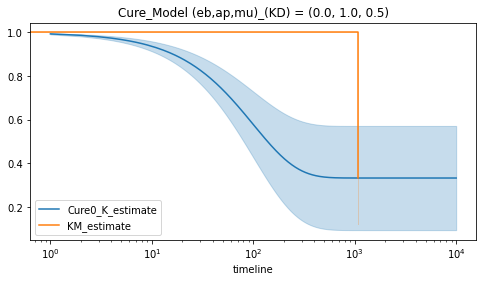

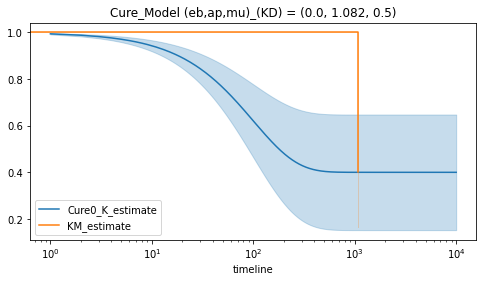

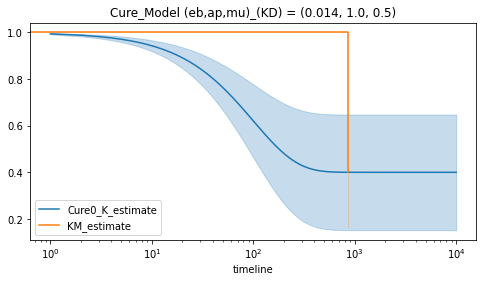

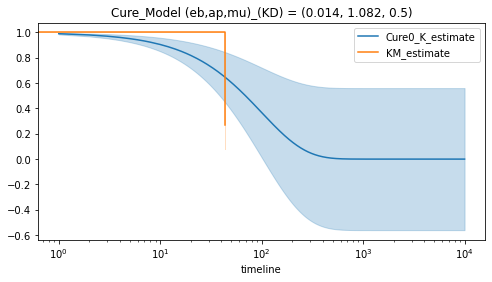

In [2]:

p_s = []
lambda_s = []
ap_s = []
p_se0 = []
lambda_se0 = []

for x in range(start_eb,end_eb,inc_eb):
    pv = 0
    for y in range(start_ap,end_ap,inc_ap):
        p_, p_se= CureModelLL_K.CureModelLL_K(np.abs(ebs[x]),aps[y],mu,STIME[x,y,:],Np, pv)
        p_s.append(p_)
        p_se0.append(p_se)
        ap_s.append(round(aps[y],3))
        pv = p_

        print(pv, p_se)

    

# p_s = list(np.concatenate(p_s).flat)
# p_se0 = list(np.concatenate(p_se0).flat)  #p_ standard error
# print(p_se0)
# print(p_s)


#Each segment = num of 'ap' values
ap_seg = []
p_seg = []
lambda_seg = []
p_se0_seg = [] #p_ standard error segment 




# For each seperate segment of p_ and ap_s values (one for each eb value)
for i in range(int(len(len_ap)*len(len_eb)/len(len_ap))):
    p_seg.append(p_s[i*len(len_ap):(i+1)*len(len_ap)])
#     print("p_ value segment = {}".format(p_seg[i]))
    p_se0_seg.append(p_se0[i*len(len_ap):(i+1)*len(len_ap)])
#     print("p_se segment = {}".format(p_se0[i]))
    ap_seg.append(ap_s[i*len(len_ap):(i+1)*len(len_ap)])

 


[-30, 10]
[-30, 10]


/cita/modules/python/3.10.2/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/cita/modules/python/3.10.2/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.06, 0.5, 'Binary Eccentricity (ebs)')

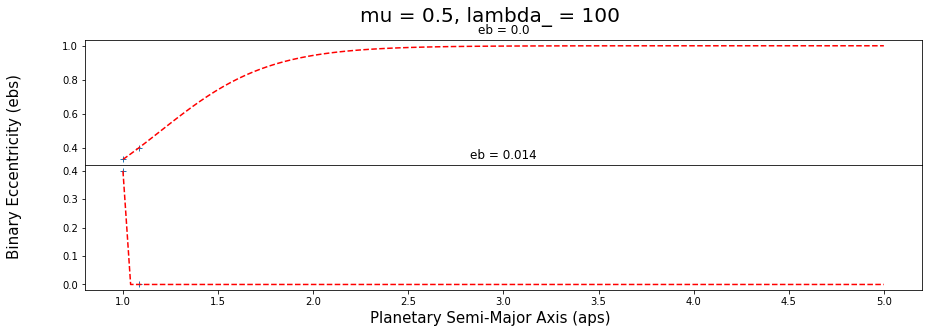

In [3]:
#***(1)**********p_ & lambda_************#

#****************EXPIT FUNCTION**********************#
from scipy.optimize import curve_fit
from autograd.scipy.special import expit

#expit(x) = 1/(1+exp(-x))
def expit_reg(x,a,b):
    beta = a + b*x
#     beta = b*(x - a)
    return expit(beta)

#****************************PLOTTING*****************#


fig = plt.figure(figsize = (15,2.3*len(len_eb)), facecolor = (1,1,1))

# gs = fig.add_gridspec(2, hspace=0)
gs = fig.add_gridspec(len(len_eb), hspace=0)
# #(len(len_eb), 2)

axs = gs.subplots(sharex=False, sharey=False)
fig.suptitle('mu = {}, lambda_ = 100'.format(mu), size = 20)

p0 = [-30,10]
avals , bvals = [], []

for i in range(0,len(len_eb),1):
    #************p_*************************#
#     axs[i].errorbar(ap_seg[i], p_seg[i], xerr = None,yerr = p_se0_seg[i])
    axs[i].plot(ap_seg[i],p_seg[i], '+')
    
    
for i in range(0,len(len_eb),1):
#     popt_p, pcov_p = curve_fit(expit_reg, ap_seg[i],p_seg[i],sigma = p_se0_seg[i],p0 = p0, maxfev=5000)
    popt_p, pcov_p = curve_fit(expit_reg, ap_seg[i],p_seg[i], p0=p0, maxfev=5000)

    a_p,b_p = popt_p
    avals.append(a_p)
    bvals.append(b_p)
    x_s_p = np.linspace(1.0,5.0, 100)
    y_s_p = expit_reg(x_s_p, a_p, b_p)
    axs[i].plot(x_s_p, y_s_p, '--', color = 'red')
    axs[i].set_title('eb = {}'.format(round(len_eb[i],3)))
#     plt.set_suptitle('p_')
#     p0 = [a_p,b_p]
#     p0 = [max(a_p,-400),min(b_p,200)]
    print(p0)



#common x-label
fig.text(0.5, 0.04, 'Planetary Semi-Major Axis (aps)', ha='center', va='center', size = 15)
#common y-label
fig.text(0.06, 0.5, 'Binary Eccentricity (ebs)', ha='center', va='center', rotation='vertical', size = 15)
    

# fig.savefig('Curve_fit(expit;mu = {})(eb(0,50,1))(ap(0,50,1))_(lambda_=(100)_(KD)).png'.format(mu), dpi = 250)


In [4]:
#***(2)**********PLOTTING a_vals and b_vals as a function of eb************#

#****************EXPIT FUNCTION**********************#
from scipy.optimize import curve_fit
from autograd.scipy.special import expit

#expit(x) = 1/(1+exp(-x))
def expit_reg(x,a,b):
    beta = a + b*x
    return expit(beta)

#Critical semi-major axis (H&W(1999) Eq. 5)
def ac_func(x,a,b,c):
    y = a + b*x + c*x**2
    return y

#****************************PLOTTING*****************#
fig = plt.figure(num=None, dpi=80, figsize = (6,15), facecolor='w', edgecolor='k')
fig.canvas.set_window_title('Window Title')

p0 = [-30,10]
avals , bvals = [], []

#Calculating avals & bvals
for i in range(0,len(len_eb),1):
    popt_p, pcov_p = curve_fit(expit_reg, ap_seg[i],p_seg[i], p0=p0, maxfev=5000)
    a_p,b_p = popt_p
    avals.append(a_p)
    bvals.append(b_p)

#initial guess
p1 = [2,4,-2]
#critical semi-major axis
ac = -(np.array(avals)/np.array(bvals))
# print(ac)

#Curve_fit for ac_func
popt_ac, pcov_ac = curve_fit(ac_func,len_eb, ac,p0=p1)
a_ac,b_ac,c_ac = popt_ac

print(popt_ac)
x_s_p = np.linspace(0.0, 0.7, 100)
y_s_p = ac_func(x_s_p, a_ac, b_ac, c_ac)

#************PLOTTING*************************#
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# ebs vs. ac = -a/b
ax1.title.set_text('ebs vs. ac_values : Lambda_ = 100_(KD)')
ax1.set_ylabel('ac_values', fontsize = 12)
ax1.plot(len_eb, ac, '+', color = 'green')
ax1.plot(x_s_p, y_s_p, '--', color = 'red')
# ebs vs. b= s
ax2.title.set_text('ebs vs. s_ values')
ax2.set_xlabel('ebs', fontsize = 12)
ax2.set_ylabel('s_values', fontsize = 12)
ax2.plot(len_eb, bvals, '+', color = 'green')


#***** NEW VARIABLE (Lam & Kipping 2018)***********#
# xi = 0.5*(ap**1.5 - np.floor(ap**1.5))


# plt.show()
# fig.savefig('Curve_fit(ac_func ;mu = {})(eb(0,50,1))(ap(0,50,1))_(lambda_=(100)_(KD)).png'.format(mu), dpi = 250)


/tmp/ipykernel_2709084/2353226122.py:19: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Window Title')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


TypeError: The number of func parameters=3 must not exceed the number of data points=2

<Figure size 480x1200 with 0 Axes>

In [ ]:
# #***(3)********Contour Plotting (2D & 3D)************#

# # A = np.stack((len_eb, len_ap))
# # # A = np.stack((len_eb, len_ap), axis = -1)

# # print(A)
# # Alist = A.tolist()
# # print(Alist)


# #******************FOR LOOP**************************#
# # format = [ebs, aps, p_]; p_ = singular value or array??

# A = [] 
# for i in range(0,ebs, 1):
#     for j in range(0, aps, 1):
#         for k in range(0,p_seg, 1):
#             A.append(i,j,k)
            

# #****************EXPIT FUNCTION**********************#
# from scipy.optimize import curve_fit
# from autograd.scipy.special import expit

# #expit(x) = 1/(1+exp(-x))
# def expit_reg(datA,a,b):
#     beta = a + b*x
#     return expit(beta)

# #****************************PLOTTING*****************#


# fig = plt.figure(figsize = (5,6), facecolor = (1,1,1))
# gs = fig.add_gridspec(hspace=0)
# axs = gs.subplots(sharex=False, sharey=False)

# p0 = [-30,10]
# avals , bvals = [], []

# popt_p, pcov_p = curve_fit(expit_reg, Alist,p_seg[i], p0=p0, maxfev=5000)
# #     x_s_p = np.linspace(1.0,5.0, 100)
# #     y_s_p = expit_reg(x_s_p, a_p, b_p)
# #     axs[i].plot(x_s_p, y_s_p, '--', color = 'red')
# #     axs[i].set_title('eb = {}'.format(round(len_eb[i],3)))
# # #     plt.set_suptitle('p_')
# #     p0 = [max(a_p,-400),min(b_p,200)]
# #     print(p0)


    


# # ax1 = fig.add_subplot(211)

# # ax1.title.set_text('ebs vs. a_values : Lambda_ = 100')
# # ax1.set_ylabel('a_values', fontsize = 12)
# # ax1.plot(ebs, avals, '+', color = 'green')
# # plt.show()
# # fig.savefig('ebs vs. a_ & b_ vals(lambda_=(100)).png'.format(mu), dpi = 250)

# x = np.linspace(0, 5, 50)
# y = np.linspace(0, 5, 40)

# X, Y = np.meshgrid(x, y)
# Z = f(X, Y)



